In [133]:
import pandas as pd # import pandas 
import os 
bookings = pd.read_csv("/Users/brindamunuswamy/Desktop/MIS581/h2Features.csv") # read CSV into pandas
bookings.head(15) #reading top 5 rows

,is_canceled,lead_time,stays_in_week_nights,adults,children,babies,meal,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,different_assigned_room
0,0,6,2,1,0.0,0,2,7,4,0,0,0,0,1,0,3,0,0,0
1,1,88,4,2,0.0,0,1,6,4,0,0,0,0,1,0,3,0,1,0
2,1,65,4,1,0.0,0,1,6,4,0,0,0,0,1,0,3,0,1,0
3,1,92,4,2,0.0,0,1,6,4,0,0,0,0,1,0,3,0,2,0
4,1,100,2,2,0.0,0,1,6,4,0,0,0,0,1,0,3,0,1,0
5,1,79,3,2,0.0,0,1,6,4,0,0,0,0,1,0,3,0,1,0
6,0,3,3,1,0.0,0,2,5,4,0,0,0,1,1,0,4,0,0,0
7,1,63,3,1,0.0,0,1,6,4,0,0,0,0,1,0,3,0,0,0
8,1,62,3,2,0.0,0,1,6,4,0,0,0,0,1,0,3,0,1,0
9,1,62,3,2,0.0,0,1,6,4,0,0,0,0,1,0,3,0,1,0


In [134]:
bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79330 entries, 0 to 79329
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   is_canceled                     79330 non-null  int64  
 1   lead_time                       79330 non-null  int64  
 2   stays_in_week_nights            79330 non-null  int64  
 3   adults                          79330 non-null  int64  
 4   children                        79330 non-null  float64
 5   babies                          79330 non-null  int64  
 6   meal                            79330 non-null  int64  
 7   market_segment                  79330 non-null  int64  
 8   distribution_channel            79330 non-null  int64  
 9   is_repeated_guest               79330 non-null  int64  
 10  previous_cancellations          79330 non-null  int64  
 11  previous_bookings_not_canceled  79330 non-null  int64  
 12  booking_changes                 

In [135]:
bookings.isnull().sum()

is_canceled                       0
lead_time                         0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
required_car_parking_spaces       0
total_of_special_requests         0
different_assigned_room           0
dtype: int64

In [136]:
#bookings['children'] = bookings['children'].fillna(0) # replace null with 0 

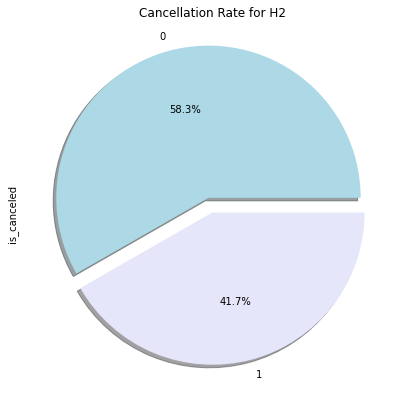

In [137]:
import matplotlib.pyplot as plt #benchmark cancellation rate for h2
piedata = bookings['is_canceled'].value_counts()
name=piedata.index.tolist()
my_labels = name
my_colors = ['lightblue','lavender'] # custom colors
my_explode = (0.1,0) # custom effects
plt.figure(figsize=(7,7)) #custom size for the pie chart
piedata.plot.pie(autopct="%.1f%%",colors=my_colors,explode=my_explode,shadow=True,labels=my_labels) #pie chart creation
plt.title("Cancellation Rate for H2")
plt.show() # displaying only chart without the extra information

In [138]:
X=bookings.iloc[:, [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]] 
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79330 entries, 0 to 79329
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   lead_time                       79330 non-null  int64  
 1   stays_in_week_nights            79330 non-null  int64  
 2   adults                          79330 non-null  int64  
 3   children                        79330 non-null  float64
 4   babies                          79330 non-null  int64  
 5   meal                            79330 non-null  int64  
 6   market_segment                  79330 non-null  int64  
 7   distribution_channel            79330 non-null  int64  
 8   is_repeated_guest               79330 non-null  int64  
 9   previous_cancellations          79330 non-null  int64  
 10  previous_bookings_not_canceled  79330 non-null  int64  
 11  booking_changes                 79330 non-null  int64  
 12  deposit_type                    

In [139]:
#X=X.astype({"children": int})

In [140]:
Y = bookings.iloc[:,[0]]
Y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79330 entries, 0 to 79329
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   is_canceled  79330 non-null  int64
dtypes: int64(1)
memory usage: 619.9 KB


In [141]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [142]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier() #default parameters without explanation
import numpy as np
rf.fit(X_train,np.ravel(Y_train))

RandomForestClassifier()

In [143]:
Y_pred=rf.predict(X_test) # predictions for test data set

In [144]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
accuracy = metrics.accuracy_score(Y_test, Y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 82.62%


In [145]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

In [37]:
rf_score = cross_val_score(rf, X, np.ravel(Y), cv=10, scoring='roc_auc') # eval random forest
print("Mean AUC Score - Random Forest: ", rf_score.mean())

Mean AUC Score - Random Forest:  0.7966621321614912


In [146]:
print(confusion_matrix(Y_test, Y_pred))

[[12052  1756]
 [ 2381  7610]]


In [147]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85     13808
           1       0.81      0.76      0.79      9991

    accuracy                           0.83     23799
   macro avg       0.82      0.82      0.82     23799
weighted avg       0.83      0.83      0.83     23799



In [148]:
df = pd.DataFrame(data=Y_pred, columns=["Is_Canceled"])
df['Is_Canceled'].value_counts()

0    14433
1     9366
Name: Is_Canceled, dtype: int64

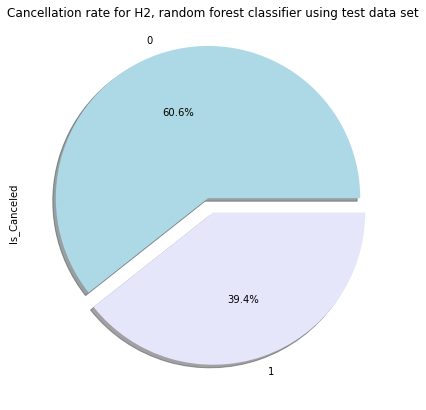

In [149]:
piedata = df['Is_Canceled'].value_counts()  # cancellation rate for pred based on test data set
my_colors = ['lightblue','lavender'] # custom colors
my_explode = (0.1,0) # custom effects
plt.figure(figsize=(7,7)) #custom size for the pie chart
piedata.plot.pie(autopct="%.1f%%",colors=my_colors,explode=my_explode,shadow=True) #pie chart creation
plt.title("Cancellation rate for H2, random forest classifier using test data set")
plt.show() # displaying only chart without the extra information

In [150]:
whatif_leadtime = X.copy()
whatif_leadtime.loc[whatif_leadtime.lead_time !=569874574,"lead_time"] = 10
whatif_leadtime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79330 entries, 0 to 79329
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   lead_time                       79330 non-null  int64  
 1   stays_in_week_nights            79330 non-null  int64  
 2   adults                          79330 non-null  int64  
 3   children                        79330 non-null  float64
 4   babies                          79330 non-null  int64  
 5   meal                            79330 non-null  int64  
 6   market_segment                  79330 non-null  int64  
 7   distribution_channel            79330 non-null  int64  
 8   is_repeated_guest               79330 non-null  int64  
 9   previous_cancellations          79330 non-null  int64  
 10  previous_bookings_not_canceled  79330 non-null  int64  
 11  booking_changes                 79330 non-null  int64  
 12  deposit_type                    

In [151]:
whatif_leadtime['lead_time'].value_counts()


10    79330
Name: lead_time, dtype: int64

In [152]:
#whatif_leadtime=whatif_leadtime.astype({"lead_time": int})
whatif_leadtime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79330 entries, 0 to 79329
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   lead_time                       79330 non-null  int64  
 1   stays_in_week_nights            79330 non-null  int64  
 2   adults                          79330 non-null  int64  
 3   children                        79330 non-null  float64
 4   babies                          79330 non-null  int64  
 5   meal                            79330 non-null  int64  
 6   market_segment                  79330 non-null  int64  
 7   distribution_channel            79330 non-null  int64  
 8   is_repeated_guest               79330 non-null  int64  
 9   previous_cancellations          79330 non-null  int64  
 10  previous_bookings_not_canceled  79330 non-null  int64  
 11  booking_changes                 79330 non-null  int64  
 12  deposit_type                    

In [153]:
LT_pred = rf.predict(whatif_leadtime) # predictions for what-if data with lead time = 10

In [154]:
df = pd.DataFrame(data=LT_pred, columns=["Is_Canceled"])
df['Is_Canceled'].value_counts()

0    51007
1    28323
Name: Is_Canceled, dtype: int64

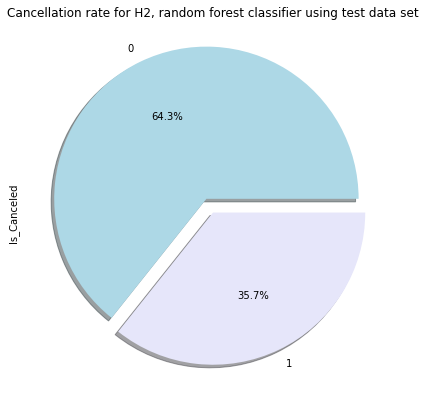

In [155]:
piedata = df['Is_Canceled'].value_counts()  # cancellation rate for pred based on test data set
my_colors = ['lightblue','lavender'] # custom colors
my_explode = (0.1,0) # custom effects
plt.figure(figsize=(7,7)) #custom size for the pie chart
piedata.plot.pie(autopct="%.1f%%",colors=my_colors,explode=my_explode,shadow=True) #pie chart creation
plt.title("Cancellation rate for H2, random forest classifier using test data set")
plt.show() # displaying only chart without the extra information

In [156]:
accuracy = metrics.accuracy_score(Y, LT_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 78.52%


In [158]:
whatif_channel = X.copy()

whatif_channel['distribution_channel'].value_counts()

4    68945
2     6780
1     3408
3      193
5        4
Name: distribution_channel, dtype: int64

In [159]:
whatif_channel.loc[whatif_channel.distribution_channel==1,"distribution_channel"] = 2
whatif_channel.loc[whatif_channel.distribution_channel==2,"distribution_channel"] = 2
whatif_channel.loc[whatif_channel.distribution_channel==3,"distribution_channel"] = 2
whatif_channel.loc[whatif_channel.distribution_channel==4,"distribution_channel"] = 2
whatif_channel.loc[whatif_channel.distribution_channel==5,"distribution_channel"] = 2

whatif_channel['distribution_channel'].value_counts()

2    79330
Name: distribution_channel, dtype: int64

In [160]:
#whatif_channel=whatif_channel.astype({"distribution_channel": int})
whatif_leadtime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79330 entries, 0 to 79329
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   lead_time                       79330 non-null  int64  
 1   stays_in_week_nights            79330 non-null  int64  
 2   adults                          79330 non-null  int64  
 3   children                        79330 non-null  float64
 4   babies                          79330 non-null  int64  
 5   meal                            79330 non-null  int64  
 6   market_segment                  79330 non-null  int64  
 7   distribution_channel            79330 non-null  int64  
 8   is_repeated_guest               79330 non-null  int64  
 9   previous_cancellations          79330 non-null  int64  
 10  previous_bookings_not_canceled  79330 non-null  int64  
 11  booking_changes                 79330 non-null  int64  
 12  deposit_type                    

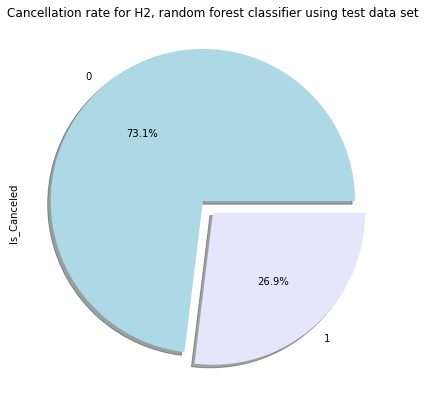

In [161]:
DC_pred = rf.predict(whatif_channel)
df = pd.DataFrame(data=DC_pred, columns=["Is_Canceled"])
df['Is_Canceled'].value_counts()
piedata = df['Is_Canceled'].value_counts()  # cancellation rate for pred based on test data set
my_colors = ['lightblue','lavender'] # custom colors
my_explode = (0.1,0) # custom effects
plt.figure(figsize=(7,7)) #custom size for the pie chart
piedata.plot.pie(autopct="%.1f%%",colors=my_colors,explode=my_explode,shadow=True) #pie chart creation
plt.title("Cancellation rate for H2, random forest classifier using test data set")
plt.show() # displaying only chart without the extra information

In [162]:
accuracy = metrics.accuracy_score(Y, DC_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 82.19%


In [163]:
whatif_paid = X.copy()
whatif_paid['deposit_type'].value_counts()

1    66442
2    12868
3       20
Name: deposit_type, dtype: int64

In [164]:

whatif_paid.loc[whatif_paid.deposit_type==1,"deposit_type"] = 1
whatif_paid.loc[whatif_paid.deposit_type==2,"deposit_type"] = 1
whatif_paid.loc[whatif_paid.deposit_type==3,"deposit_type"] = 1
whatif_paid['deposit_type'].value_counts()


1    79330
Name: deposit_type, dtype: int64

In [165]:
#whatif_paid=whatif_paid.astype({"deposit_type": int})
whatif_paid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79330 entries, 0 to 79329
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   lead_time                       79330 non-null  int64  
 1   stays_in_week_nights            79330 non-null  int64  
 2   adults                          79330 non-null  int64  
 3   children                        79330 non-null  float64
 4   babies                          79330 non-null  int64  
 5   meal                            79330 non-null  int64  
 6   market_segment                  79330 non-null  int64  
 7   distribution_channel            79330 non-null  int64  
 8   is_repeated_guest               79330 non-null  int64  
 9   previous_cancellations          79330 non-null  int64  
 10  previous_bookings_not_canceled  79330 non-null  int64  
 11  booking_changes                 79330 non-null  int64  
 12  deposit_type                    

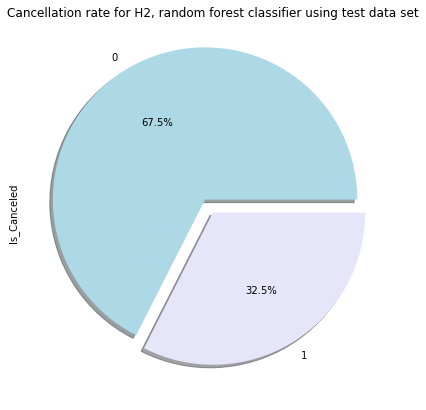

In [166]:
DT_pred = rf.predict(whatif_paid)
df = pd.DataFrame(data=DT_pred, columns=["Is_Canceled"])
df['Is_Canceled'].value_counts()
piedata = df['Is_Canceled'].value_counts()  # cancellation rate for pred based on test data set
my_colors = ['lightblue','lavender'] # custom colors
my_explode = (0.1,0) # custom effects
plt.figure(figsize=(7,7)) #custom size for the pie chart
piedata.plot.pie(autopct="%.1f%%",colors=my_colors,explode=my_explode,shadow=True) #pie chart creation
plt.title("Cancellation rate for H2, random forest classifier using test data set")
plt.show() # displaying only chart without the extra information

In [168]:
accuracy = metrics.accuracy_score(Y, DT_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 82.92%
